In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df_base = pd.read_csv('data/food-facts/data.featureEngineering.tsv', sep='\t', dtype={'code':str})

In [73]:
df_base.shape

(170239, 13)

In [75]:
df_base = df_base.set_index(["code"])

In [76]:
df_base.head()

,created_datetime,product_name,brands,ingredients_text,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,organic
code,,,,,,,,,,,,
4559,03/09/2017,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",1941.0,17.86,0.00,60.71,17.86,0.63500,0.250,None-Organic
16087,03/09/2017,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",2540.0,57.14,5.36,17.86,3.57,1.22428,0.482,Organic
16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,1552.0,1.43,0.00,77.14,0.00,0.00000,0.000,Organic
16100,03/09/2017,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",1933.0,18.27,1.92,63.46,11.54,0.00000,0.000,None-Organic
16117,03/09/2017,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,1490.0,0.00,0.00,80.00,0.00,0.00000,0.000,Organic


In [77]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170239 entries, 4559 to 999990026839
Data columns (total 12 columns):
created_datetime      170239 non-null object
product_name          170239 non-null object
brands                170239 non-null object
ingredients_text      170239 non-null object
energy_100g           170239 non-null float64
fat_100g              170239 non-null float64
saturated-fat_100g    170239 non-null float64
carbohydrates_100g    170239 non-null float64
sugars_100g           170239 non-null float64
salt_100g             170239 non-null float64
sodium_100g           170239 non-null float64
organic               170239 non-null object
dtypes: float64(7), object(5)
memory usage: 16.9+ MB


In [78]:
def bar_chart(feature):
    # create pandas.core.series.Series
    none = df_base[df_base['organic']=='None-Organic'][feature].value_counts()
    organic = df_base[df_base['organic']=='Organic'][feature].value_counts()
    df_deter_organic = pd.DataFrame([none,organic])
    df_deter_organic.index = ['None-organic','Organic']
    df_deter_organic.plot(kind='bar',stacked=True, figsize=(10,5))

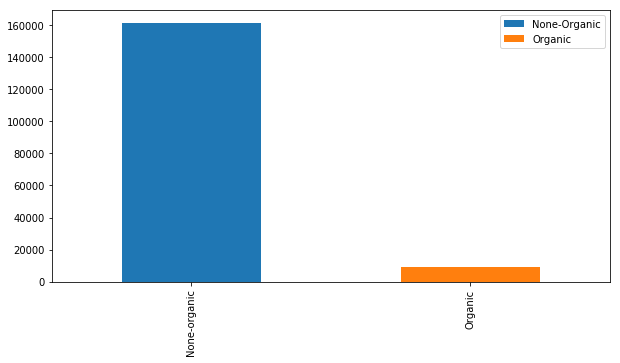

In [79]:
bar_chart('organic')

In [21]:
df_rm_pure_salt_sugar['organic'].shape

(172922,)

In [22]:
df_rm_pure_salt_sugar['organic'].value_counts()

False    163813
True       9109
Name: organic, dtype: int64

In [23]:
seri_ogranic = df_rm_pure_salt_sugar['organic'].value_counts().astype(float) / df_rm_pure_salt_sugar.shape[0]

In [24]:
seri_ogranic

False    0.947323
True     0.052677
Name: organic, dtype: float64

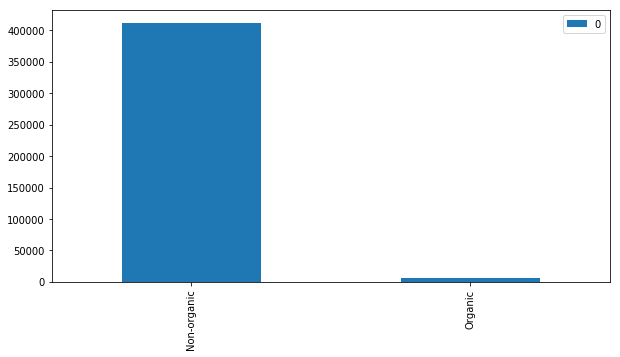

In [25]:
none = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['salt_100g'].sum()
organic = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['salt_100g'].sum()
df_organic_salt = pd.DataFrame([none,organic])
df_organic_salt.index = ['Non-organic','Organic']
df_organic_salt.plot(kind='bar',stacked=True, figsize=(10,5))

In [26]:
df_organic_salt

,0
Non-organic,411365.422724
Organic,6542.174295


In [27]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['salt_100g'].sum() / df_organic_salt.sum()

0    0.984345
dtype: float64

In [28]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['salt_100g'].sum() / df_organic_salt.sum()

0    0.015655
dtype: float64

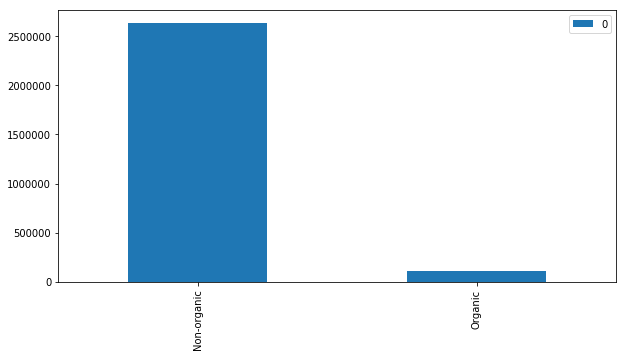

In [29]:
none_sugar = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['sugars_100g'].sum()
organic_sugar  = df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['sugars_100g'].sum()
df_organic_sugar = pd.DataFrame([none_sugar,organic_sugar])
df_organic_sugar.index = ['Non-organic','Organic']
df_organic_sugar.plot(kind='bar',stacked=True, figsize=(10,5))

In [30]:
df_organic_sugar

,0
Non-organic,2632876.396
Organic,115421.587


In [31]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==False]['sugars_100g'].sum() / df_organic_sugar.sum()

0    0.958003
dtype: float64

In [32]:
df_rm_pure_salt_sugar[df_rm_pure_salt_sugar['organic']==True]['sugars_100g'].sum() / df_organic_sugar.sum()

0    0.041997
dtype: float64

In [33]:
df_rm_pure_salt_sugar.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic,grams,salt_sodium_100g,titled_sugar,titled_salt
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0,0.0,0.0,0.0,False,28.0,0.00000,False,False
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,False,28.0,0.88500,False,False
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,True,28.0,1.70628,False,True
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,True,35.0,0.00000,False,False
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0,0.0,0.0,0.0,False,52.0,0.00000,False,False


In [37]:
len(df_rm_pure_salt_sugar['brands'].unique())

28285

In [38]:
seri_brands_cnt = df_rm_pure_salt_sugar['brands'].value_counts()

In [39]:
seri_brands_cnt.drop('None', inplace=True)

In [46]:
seri_brands_cnt.iloc[0:30].index

Index(['Meijer', 'Kroger', 'Ahold', 'Spartan', 'Roundy's', 'Great Value',
       'Weis', 'Target Stores', 'Shoprite', 'Food Club', 'Harris Teeter',
       'Food Lion', 'Essential Everyday', 'Goya', 'Schnucks', 'Weis Quality',
       'Hannaford,  Hannaford Bros. Co.', 'Giant', 'Giant Eagle', 'Wegmans',
       'Meijer,  Meijer  Inc.',
       '365 Everyday Value,  Whole Foods Market  Inc.', 'Trader Joe's',
       'Hy-Vee', 'Food Lion,  Food Town Stores Inc.', 'Fresh & Easy',
       'Raley's', 'Market Pantry', 'Wal-Mart Stores  Inc.', 'Key Food'],
      dtype='object')

In [54]:
df_total_sugar_by_brands = df_rm_pure_salt_sugar.pivot_table("sugars_100g", index="brands", columns="organic", aggfunc=sum)

In [64]:
df_total_sugar_by_brands.iloc[0:5]

organic,False,True
brands,,
!Ajua!,35.83,NaN
"""Dirty""",3.53,NaN
"""Grana"" Sp. Z O. O.",50.00,NaN
0 72935 01160 4,0.00,NaN
1 2,21.43,NaN


In [65]:
df_total_sugar_by_brands.shape

(28285, 2)

In [67]:
seri_brands_cnt = df_total_sugar_by_brands['brands'].value_counts()

KeyError: 'brands'

In [24]:
# remove duplicate
df_rm_dup = df_base[df_base.code.duplicated() == False]

In [25]:
df_rm_dup.shape

(172944, 33)

In [39]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 33 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [33]:
# NaN makes an error
df_rm_dup[['product_name','brands','ingredients_text','allergens','main_category']] = \
df_rm_dup[['product_name','brands','ingredients_text','allergens','main_category']].fillna("None").values

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TaeWoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
# NaN makes an error
df_rm_dup[['serving_size','ingredients_from_palm_oil_n']] = \
df_rm_dup[['serving_size','ingredients_from_palm_oil_n']].fillna(0).values

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TaeWoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
df_rm_dup.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,iron_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.00129,0.0,0.0,0.0,0.0214,0.0,0.0,0.0,0.0,0.0
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.00129,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.00514,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.00000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.00346,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0


In [38]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 33 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [42]:
df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)

0         False
1         False
2          True
3          True
4         False
5          True
6          True
7          True
8          True
9          True
10         True
11        False
12         True
13         True
14        False
15         True
16         True
17         True
18         True
19        False
20        False
21         True
22        False
23        False
24        False
25         True
26        False
27        False
28        False
29         True
          ...  
173032    False
173033    False
173034    False
173035    False
173036    False
173037    False
173038    False
173039    False
173040    False
173041    False
173042    False
173043    False
173044    False
173045    False
173046    False
173047    False
173048    False
173049    False
173050    False
173051    False
173052    False
173053    False
173054    False
173055    False
173056    False
173057     True
173058    False
173060    False
173061    False
173062    False
Name: product_name, Leng

In [43]:
# df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)
df_rm_dup['organic'] = df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 34 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [46]:
df_rm_dup.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0,0.0,0.0214,0.0,0.0,0.0,0.0,0.0,False
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False


In [50]:
df_rm_dup.serving_size.unique

<bound method Series.unique of 0             28 g (1 ONZ)
1          28 g (0.25 cup)
2          28 g (0.25 cup)
3          35 g (0.25 cup)
4           52 g (0.5 cup)
5          45 g (0.25 cup)
6           64 g (0.5 cup)
7              40 g (40 g)
8            14 g (1 Tbsp)
9          48 g (0.25 cup)
10          57 g (0.5 cup)
11         30 g (0.25 cup)
12           21 g (2 Tbsp)
13         33 g (0.25 cup)
14          55 g (0.5 cup)
15         28 g (0.25 cup)
16         30 g (0.25 cup)
17         45 g (0.25 cup)
18         42 g (0.25 cup)
19         40 g (0.25 cup)
20         30 g (0.25 cup)
21          55 g (0.5 cup)
22         30 g (0.25 cup)
23           45 g (45 GRM)
24        1.4 g (0.25 tsp)
25          54 g (0.5 cup)
26             30 g (30 g)
27             30 g (30 g)
28             30 g (30 g)
29         30 g (0.25 cup)
                ...       
173032         56 g (56 g)
173033       70 g (2.5 oz)
173034      130 g (4.6 oz)
173035         85 g (3 oz)
173036         85 g (3 o